In [6]:
import pandas as pd
import requests
import os
import acquire as a

# 1
Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.

Save the data in your files to local csv files so that it will be faster to access in the future.


# People

In [7]:
response = requests.get('https://swapi.dev/api/people/')
response

<Response [200]>

In [8]:
data = response.json()
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [9]:
base_url = 'https://swapi.dev/api/'
ppl_url = base_url +'people/'
ppl_url

'https://swapi.dev/api/people/'

In [10]:
# films from luke only
requests.get(ppl_url + '?page=1').json()['results'][0]['films']

['https://swapi.dev/api/films/1/',
 'https://swapi.dev/api/films/2/',
 'https://swapi.dev/api/films/3/',
 'https://swapi.dev/api/films/6/']

In [11]:
requests.get(ppl_url + '?page=1').json()['results'][0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [12]:
#list of several dictionaries
requests.get(ppl_url + '?page=1').json()

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [13]:
for i in range(3):
    print(ppl_url + f'?page={i+1}')

https://swapi.dev/api/people/?page=1
https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3


In [14]:
import math
from pprint import pprint

In [15]:
page_results = []

data1 = requests.get(ppl_url + f'?page=1').json()

number_of_people = data1['count']
number_of_results = len(data1['results'])
                        
max_page = math.ceil(number_of_people / number_of_results)
#print(max_page)
for i in range(max_page):
    ppl_pg = ppl_url + f'?page={i+1}'
    #print(ppl_pg)
    data = requests.get(ppl_pg).json()
    #print(data['results'])
    for r in range(len(data['results'])):
        person = data['results'][r]
        page_results.append(person)
#pprint(page_results)

ppl_df = pd.DataFrame(page_results)

In [16]:
ppl_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [17]:
ppl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        82 non-null     object
 1   height      82 non-null     object
 2   mass        82 non-null     object
 3   hair_color  82 non-null     object
 4   skin_color  82 non-null     object
 5   eye_color   82 non-null     object
 6   birth_year  82 non-null     object
 7   gender      82 non-null     object
 8   homeworld   82 non-null     object
 9   films       82 non-null     object
 10  species     82 non-null     object
 11  vehicles    82 non-null     object
 12  starships   82 non-null     object
 13  created     82 non-null     object
 14  edited      82 non-null     object
 15  url         82 non-null     object
dtypes: object(16)
memory usage: 10.4+ KB


# Planets

In [18]:

base_url

'https://swapi.dev/api/'

In [19]:
planet_url = base_url + 'planets/'

In [20]:
response = requests.get(planet_url)
data = response.json()


In [21]:
planet_df = pd.DataFrame(data['results'])

In [22]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   rotation_period  10 non-null     object
 2   orbital_period   10 non-null     object
 3   diameter         10 non-null     object
 4   climate          10 non-null     object
 5   gravity          10 non-null     object
 6   terrain          10 non-null     object
 7   surface_water    10 non-null     object
 8   population       10 non-null     object
 9   residents        10 non-null     object
 10  films            10 non-null     object
 11  created          10 non-null     object
 12  edited           10 non-null     object
 13  url              10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [23]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])], ignore_index=True)
    

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [24]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


# Starships

In [25]:
#starships
ships_url = base_url + 'starships/'

In [26]:
response = requests.get(ships_url)
data = response.json()

In [27]:
starships_df = pd.DataFrame(data['results'])

In [28]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    10 non-null     object
 1   model                   10 non-null     object
 2   manufacturer            10 non-null     object
 3   cost_in_credits         10 non-null     object
 4   length                  10 non-null     object
 5   max_atmosphering_speed  10 non-null     object
 6   crew                    10 non-null     object
 7   passengers              10 non-null     object
 8   cargo_capacity          10 non-null     object
 9   consumables             10 non-null     object
 10  hyperdrive_rating       10 non-null     object
 11  MGLT                    10 non-null     object
 12  starship_class          10 non-null     object
 13  pilots                  10 non-null     object
 14  films                   10 non-null     object
 15  created  

In [29]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [30]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

# CSV

In [31]:
import os

In [37]:
def get_swapi_data(endpoint):
    '''
    This function will:
    - creates a csv of 'endpoint' data if one does not exist
        if one already exists, it uses the existing csv
    - outputs data as a dataframe
    
    endpoint = 'planets'
    '''
    base_url = 'https://swapi.dev/api/'
    
    if os.path.isfile(f"{endpoint}.csv"):
        df = pd.read_csv(f"{endpoint}.csv", index_col=0)
    
    else:
        response = requests.get(base_url + endpoint + '/')
        data = response.json()
        df = pd.DataFrame(data['results'])
        
        while data['next'] != None:
            print(data['next'])
            response = requests.get(data['next'])
            data = response.json()
            df = pd.concat([df, pd.DataFrame(data['results'])], ignore_index=True)
        df.to_csv(f"{endpoint}.csv")
    
    return df

In [38]:
starship = get_swapi_data('starships')
starship.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/'],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [39]:
people = get_swapi_data('people')
people.head(3)

,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
name,,,,,,,,,,,,,,,
Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [40]:
starship = get_swapi_data('starships')
starship.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/'],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [42]:
planets = get_swapi_data('planets')
planets.head(3)

,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
name,,,,,,,,,,,,,
Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


# combine

In [43]:
sw_ppl_planet_ships_df = pd.concat([people, planets, starship], axis=0)
sw_ppl_planet_ships_df.head().T

,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa
height,172,167,96,202,150
mass,77,75,32,136,49
hair_color,blond,NaN,NaN,none,brown
skin_color,fair,gold,"white, blue",white,light
eye_color,blue,yellow,red,yellow,brown
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY
gender,male,NaN,NaN,male,female
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/
films,"['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw..."
species,[],['https://swapi.dev/api/species/2/'],['https://swapi.dev/api/species/2/'],[],[]


In [ ]:
sw_ppl_planet_ships_df.tail().T

# 1

In [44]:
# get all the people
people_df = a.get_people()
people_df


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],['https://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],['https://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/species/36/'],['https://swapi.dev/api/vehicles/60/'],['https://swapi.dev/api/starships/74/'],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/species/3/'],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"['https://swapi.dev/api/films/5/', 'https://sw...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


# 2
Do the same thing, but for planets.
Save the data in your files to local csv files so that it will be faster to access in the future.



In [46]:
# get all the planets
planets_df = a.get_planets()
planets_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],['https://swapi.dev/api/films/2/'],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,NaN,"swamp, jungles",8,unknown,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,['https://swapi.dev/api/people/26/'],['https://swapi.dev/api/films/2/'],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,['https://swapi.dev/api/people/30/'],['https://swapi.dev/api/films/3/'],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"['https://swapi.dev/api/people/3/', 'https://s...","['https://swapi.dev/api/films/3/', 'https://sw...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000,"['https://swapi.dev/api/people/34/', 'https://...","['https://swapi.dev/api/films/3/', 'https://sw...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"['https://swapi.dev/api/people/22/', 'https://...",['https://swapi.dev/api/films/5/'],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


# 3
Extract the data for starships.
Save the data in your files to local csv files so that it will be faster to access in the future.


In [47]:
# get all the starships
ships_df = a.get_ships()
ships_df

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/'],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,NaN,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],['https://swapi.dev/api/films/1/'],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"['https://swapi.dev/api/people/13/', 'https://...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/
5,Y-wing,BTL Y-wing,Koensayr Manufacturing,134999,14,1000km,2,0,110,1 week,1.0,80,assault starfighter,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-12T11:00:39.817000Z,2014-12-20T21:23:49.883000Z,https://swapi.dev/api/starships/11/
6,X-wing,T-65 X-wing,Incom Corporation,149999,12.5,1050,1,0,110,1 week,1.0,100,Starfighter,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-12T11:19:05.340000Z,2014-12-20T21:23:49.886000Z,https://swapi.dev/api/starships/12/
7,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,unknown,9.2,1200,1,0,150,5 days,1.0,105,Starfighter,['https://swapi.dev/api/people/4/'],['https://swapi.dev/api/films/1/'],2014-12-12T11:21:32.991000Z,2014-12-20T21:23:49.889000Z,https://swapi.dev/api/starships/13/
8,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1143350000,19000,NaN,"279,144",38000,250000000,6 years,2.0,40,Star dreadnought,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-15T12:31:42.547000Z,2014-12-20T21:23:49.893000Z,https://swapi.dev/api/starships/15/
9,Rebel transport,GR-75 medium transport,"Gallofree Yards, Inc.",unknown,90,650,6,90,19000000,6 months,4.0,20,Medium transport,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-15T12:34:52.264000Z,2014-12-20T21:23:49.895000Z,https://swapi.dev/api/starships/17/


# 4
This step was written into the acquire functions above

# 5
Combine the data from your three separate dataframes into one large dataframe.


In [48]:
combined_df = a.combine_csv_data()
combined_df.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
name,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,Obi-Wan Kenobi,...,Solar Sailer,Trade Federation cruiser,Theta-class T-2c shuttle,Republic attack cruiser,Naboo star skiff,Jedi Interceptor,arc-170,Banking clan frigte,Belbullab-22 starfighter,V-wing
height,172,167,96,202,150,178,165,97,183,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass,77,75,32,136,49,120,75,32,84,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hair_color,blond,NaN,NaN,none,brown,"brown, grey",brown,NaN,black,"auburn, white",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skin_color,fair,gold,"white, blue",white,light,light,light,"white, red",light,fair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eye_color,blue,yellow,red,yellow,brown,blue,blue,red,brown,blue-gray,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,57BBY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,male,NaN,NaN,male,female,male,female,NaN,male,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/20/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
films,"['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/films/1/'],['https://swapi.dev/api/films/1/'],"['https://swapi.dev/api/films/1/', 'https://sw...",...,['https://swapi.dev/api/films/5/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/'],['https://swapi.dev/api/films/6/']


In [49]:
combined_df.head().T


,0,1,2,3,4
name,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa
height,172,167,96,202,150
mass,77,75,32,136,49
hair_color,blond,NaN,NaN,none,brown
skin_color,fair,gold,"white, blue",white,light
eye_color,blue,yellow,red,yellow,brown
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY
gender,male,NaN,NaN,male,female
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/
films,"['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw..."


# 6
Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [50]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
dataframe = a.get_power(url)
dataframe

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


# class example

In [52]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
germany.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [53]:
germany = germany.set_index('Date').sort_index()
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


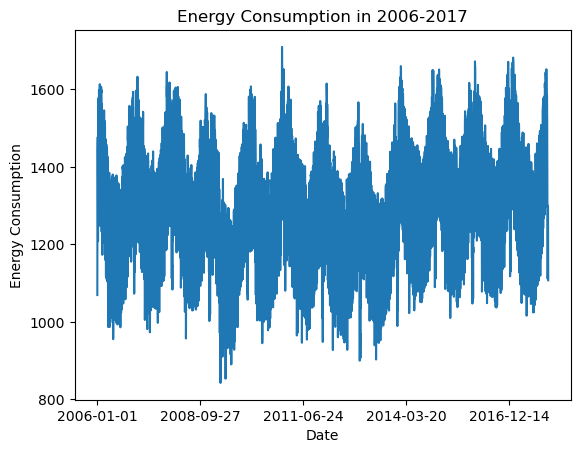

In [59]:
import matplotlib.pyplot as plt
germany.Consumption.plot()
plt.title('Energy Consumption in 2006-2017')
plt.ylabel('Energy Consumption')
plt.show()